In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
digit = load_digits()

In [5]:
X = digit.data
y = digit.target

In [6]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.75, random_state=42)

In [7]:
model = DecisionTreeClassifier()

In [8]:
model.fit(X_tr, y_tr)

DecisionTreeClassifier()

In [9]:
model.score(X_tr, y_tr)

1.0

In [10]:
y_pred = model.predict(X_te)

In [11]:
accuracy_score(y_te, y_pred)

0.8622222222222222

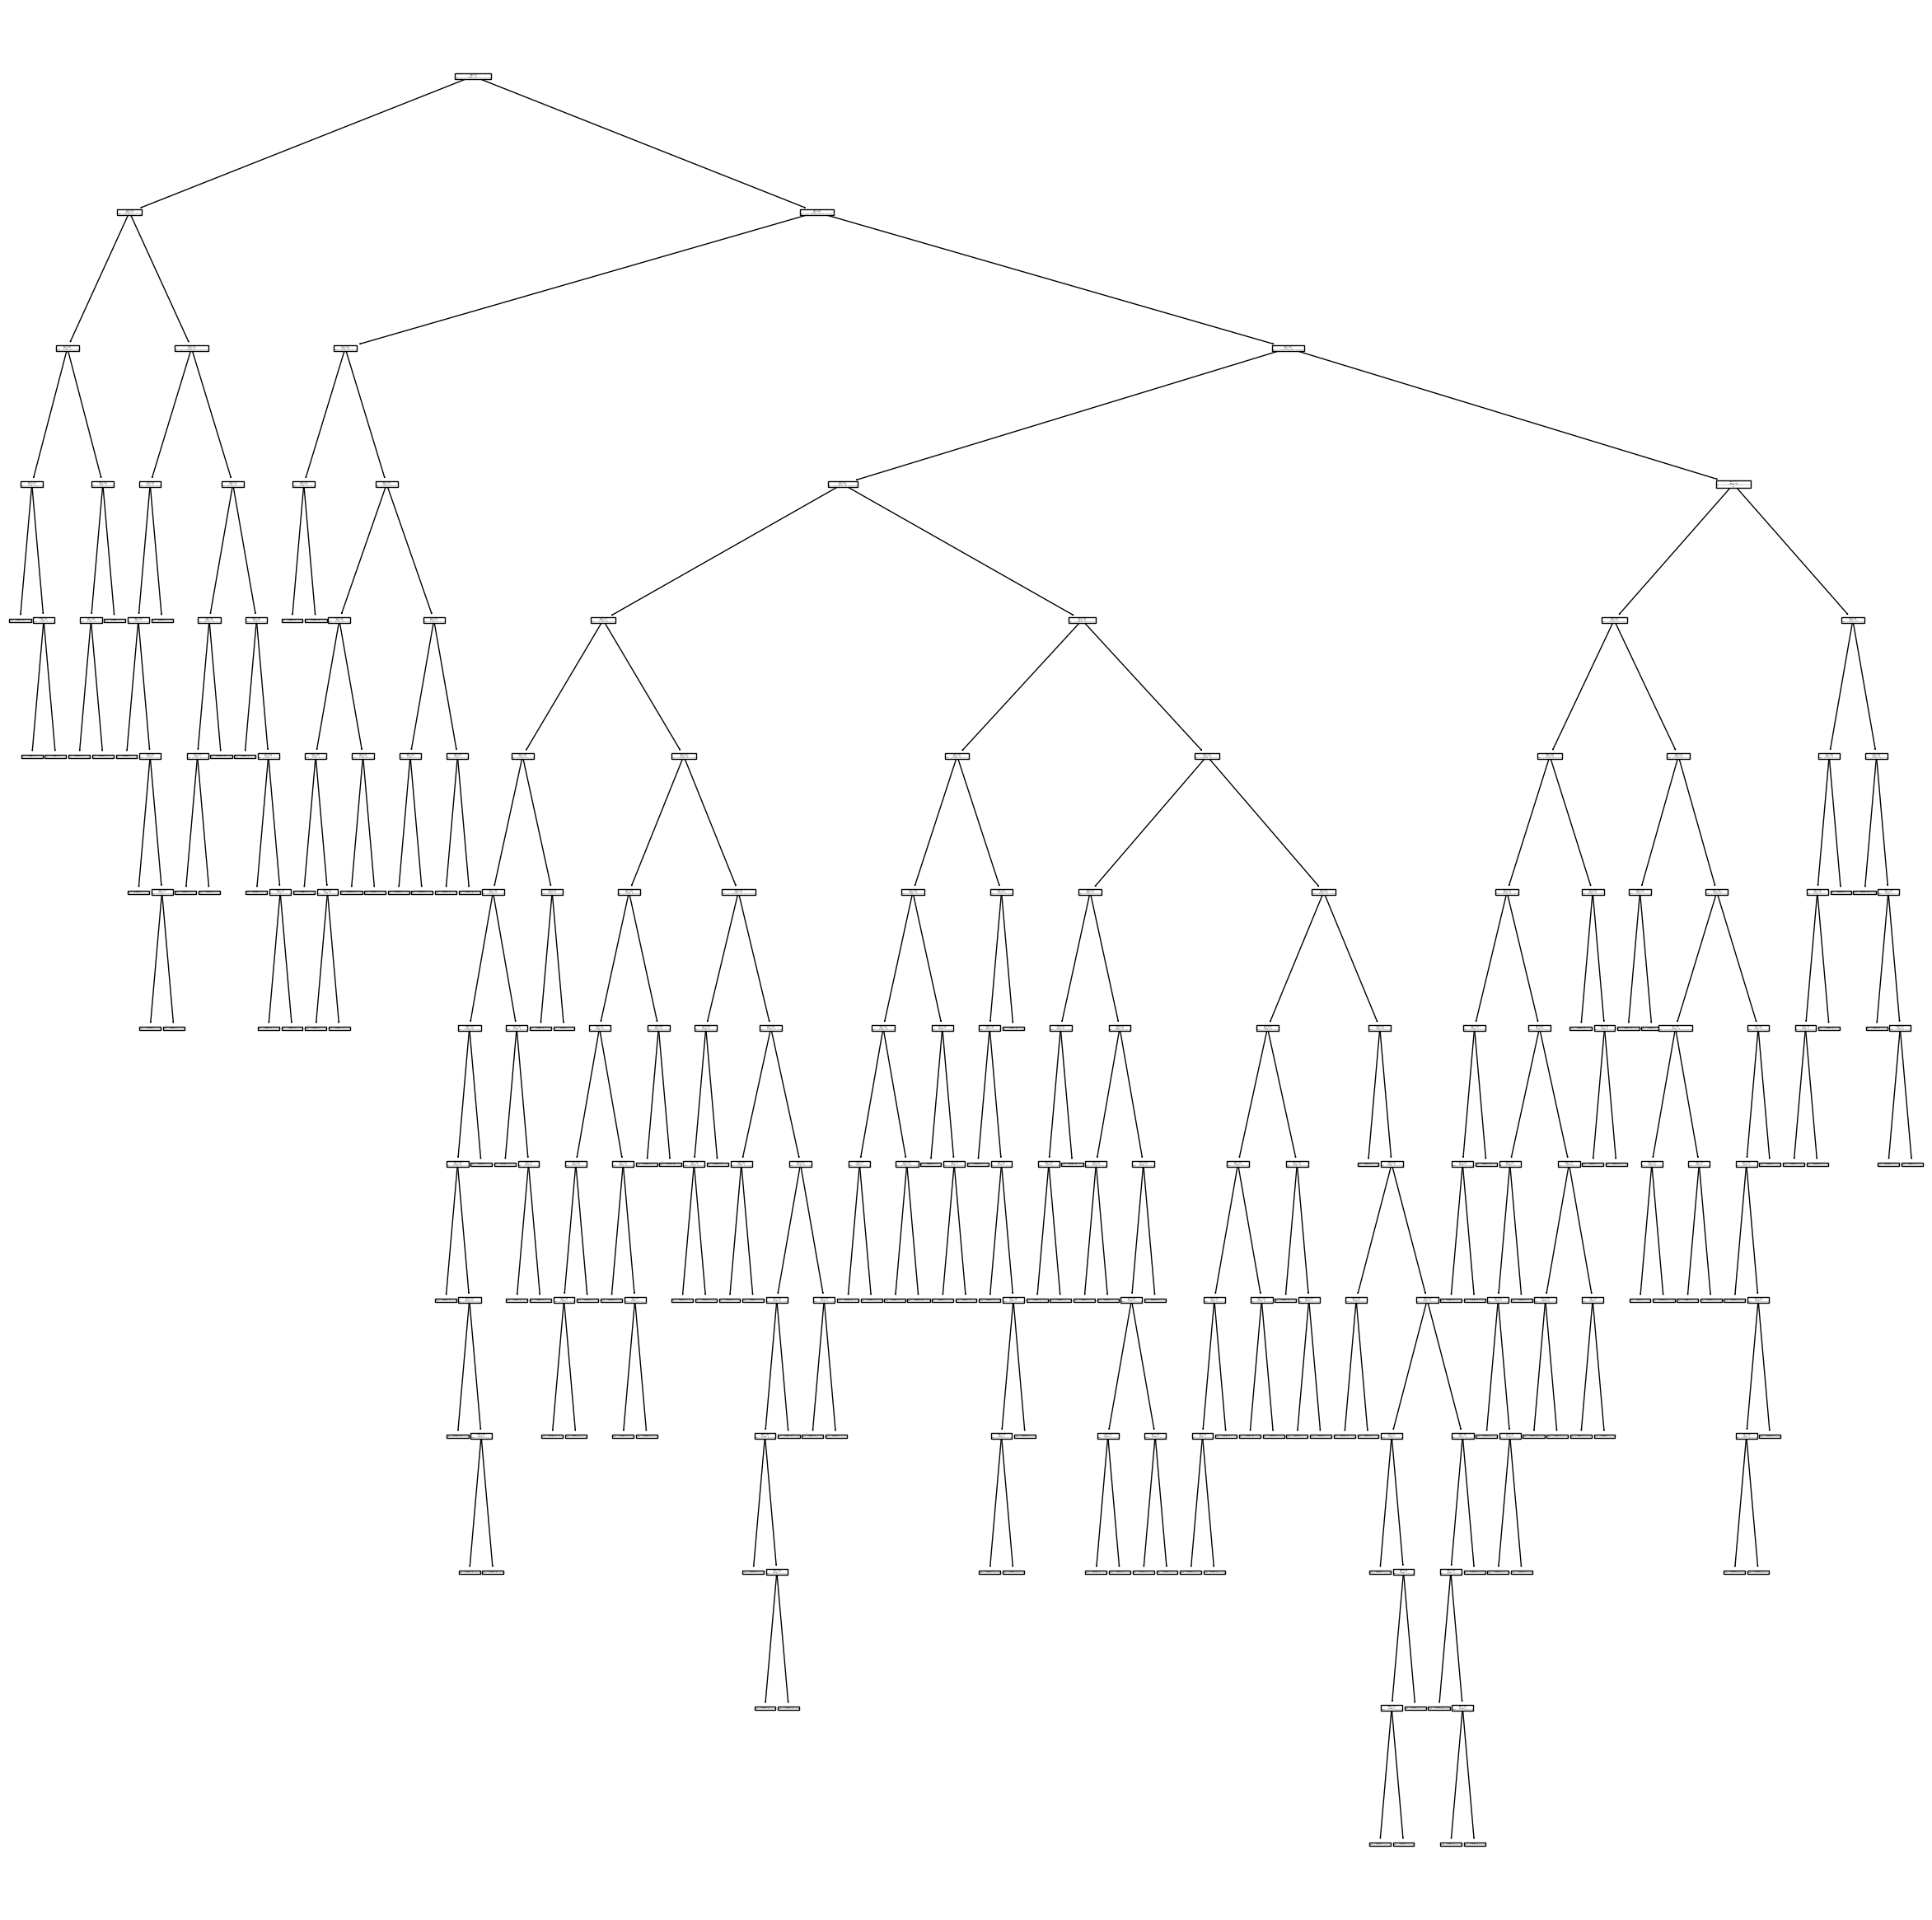

In [13]:
plt.figure(figsize=(30,30))
tree.plot_tree(model)
plt.show()

In [15]:
dt = DecisionTreeClassifier()

In [23]:
params = {"criterion":["gini", "entropy"],
         "splitter":["best", "random"],
         "max_depth":[5,6,7,8,9,10,11, 12],
         "max_features":[35, 40, 45, 50, 55, 60]}

In [24]:
gscv = GridSearchCV(dt, param_grid=params, n_jobs=-1, cv=5, verbose=True)

In [25]:
gscv.fit(X_tr, y_tr)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': [35, 40, 45, 50, 55, 60],
                         'splitter': ['best', 'random']},
             verbose=True)

In [26]:
gscv.best_score_

0.8515186562026711

In [28]:
gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 55,
 'splitter': 'best'}

In [29]:
dt2 = DecisionTreeClassifier(criterion="entropy", 
                            max_depth=12, max_features=55, splitter="best")

In [34]:
dt2.fit(X_tr, y_tr)

DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features=55)

In [35]:
dt2.score(X_tr, y_tr)

1.0

In [36]:
y_pred2 = dt2.predict(X_te)

In [37]:
accuracy_score(y_te, y_pred2)

0.8777777777777778